# Find local minima of a function with several local minima
# with shgo and dual_annealing method

## The function to be minimized is f(x)=x sin(4*np.pi abs(x-1))



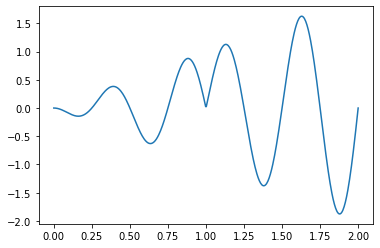

In [2]:
import numpy as np
def f(x):
    return x*np.sin(4*np.pi*abs(x-1))
    
import matplotlib.pyplot as plt
x = np.linspace(0,2,500)
plt.figure()
plt.plot(x,f(x))
plt.show()

In [19]:
from scipy.optimize import shgo

#si queremos obtener todos los mínimos locales, debemos cambiar el "sampling_method" a
# "halton" o "sobol"
minima = shgo(f, bounds=[(0,2)], n=50, iters=2, sampling_method='halton')
print("los mínimos locales se encuentran en", minima.xl)
print("con valores", minima.funl)

los mínimos locales se encuentran en [[1.87836929]
 [1.37958512]
 [0.63492204]
 [0.16144341]
 [1.        ]]
con valores [-1.87668591e+00 -1.37729573e+00 -6.29993147e-01 -1.44807582e-01
  1.68235244e-10]


In [20]:
minima = shgo(f, bounds=[(0,2)], n=50, iters=2, sampling_method='sobol')
print("los mínimos locales se encuentran en", minima.xl)
print("con valores", minima.funl)

los mínimos locales se encuentran en [[1.87836931]
 [1.37958514]
 [0.63492204]
 [0.16144341]
 [1.        ]]
con valores [-1.87668591e+00 -1.37729573e+00 -6.29993147e-01 -1.44807582e-01
  3.54393110e-09]


In [21]:
from scipy.optimize import dual_annealing
def callback(x, f, accepted):
    print("x:", x, "f:", f, "accepted:", accepted)

minima = dual_annealing(f, bounds=[(0,2)], callback=callback)

x: [1.30698534] f: [-0.85796635] accepted: 0
x: [1.37958512] f: [-1.37729573] accepted: 1
x: [1.92373385] f: [-1.57412675] accepted: 0
x: [1.87836929] f: [-1.87668591] accepted: 1


In [22]:
values = []
values_x = []
def callback(x, f, accepted):
        #if accepted == 1 append the values of the function if f is not in the list "values
    if accepted == 1:
        f = np.around(f, decimals=7)
        if values.count(f) == 0:
            values.append(f)
            values_x.append(x) 
                
for i in range(10):
    minima = dual_annealing(f, bounds=[(0,2)], callback=callback)

print(values)
print(values_x)

[array([-1.3772957]), array([-1.8766859]), array([-0.6299931])]
[array([1.37958512]), array([1.8783693]), array([0.63492204])]
